## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

---

<h2>Содержание</h2>

<div class="toc">
  <ul>
    <li><a href="#Изучение-данных-из-файла">Изучение данных из файла</a></li>
    <li><a href="#Исследовательский-анализ-данных">Исследовательский анализ данных</a></li>
       <ul>
        <li><a href="#Влияние-отзывов-на-продажи-внутри-одной-популярной-платформы">Влияние отзывов на продажи внутри одной популярной платформы</a></li>
        <li><a href="#Общее-распределение-игр-по-жанрам">Общее распределение игр по жанрам</a></li>
      </ul>
    <li><a href="#Портрет-пользователя-каждого-региона">Портрет пользователя каждого региона</a></li>
    <li><a href="#Проверка-гипотез">Проверка гипотез</a></li>
    <li><a href="#Общий-вывод">Общий вывод</a></li>
  </ul>
</div>

<style>
  .toc ul {
    font-size: 14px;
  }
</style>

---
### Цели и задачи

**Цель** - Выявить определяющие успешность игры закономерности.

**Задачи**:
    
    1. Загрузить и осмотреть данные.  
    
    2. Подготовить данные.
        2.1 Привести названия столбцов к нижнему регистру.
        2.2 Обработать пропуски.
        2.3 Посчитать суммарные продажи во всех регионах.
        
    3. Провести исследовательский анализ.
        3.1 Посмотреть, сколько игр выпускалось в разные годы.
        3.2 Посмотреть, как менялись продажи по платформам.
        3.3 Посмотреть, какие платформы лидируют по продажам, растут или падают.
        3.4 Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
        3.5 Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
        3.6 Посмотреть на общее распределение игр по жанрам.
        
    4. Составить портрет пользователя каждого региона.
        4.1 Самые популярные платформы (топ-5).
        4.2 Самые популярные жанры (топ-5).
        4.3 Посмотреть влияет ли рейтинг ESRB на продажи в отдельном регионе.
        
    5. Проверка гипотез.
        5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
        5.2 Средние пользовательские рейтинги жанров Action и Sports разные.
        
    6. Сделать выводы по итогам работы.    
    
---
    
### Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

---

## Изучение данных из файла

In [1]:
import pandas as pd ###Выводим все, знакомимся с данными
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines
from scipy import stats as st

In [2]:
data = pd.read_csv("/datasets/games.csv")

In [3]:
display(data.head())

data.info()

print('\nЧисло дубликатов:', data.duplicated().sum())

data.describe()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Число дубликатов: 0


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


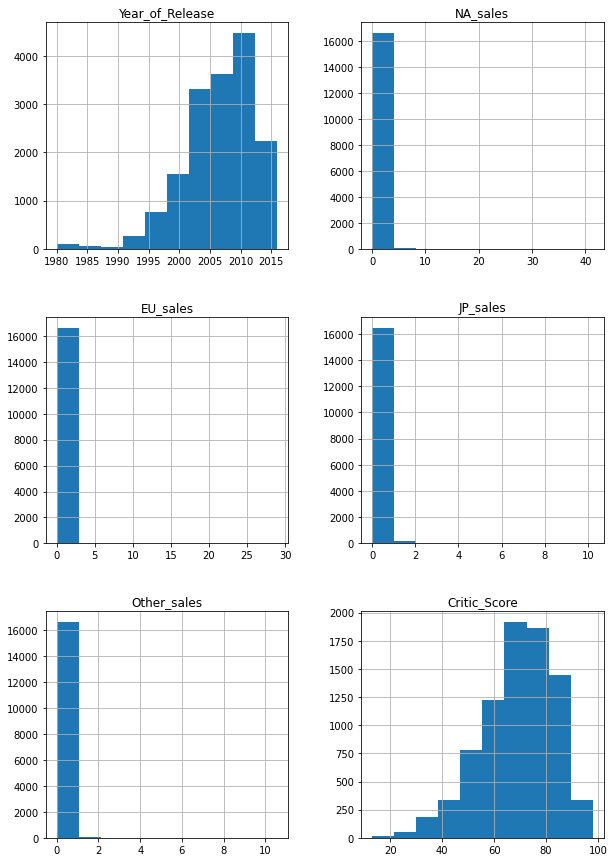

In [4]:
data.hist(figsize=(10, 15));

### Вывод
Всего 16715 записи. Для ряда столбцов есть пропущенные значения.

In [5]:
# привожу к нижнему регистру названия столбцов
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
#смотрю столбцы с которыми буду работать
display(data['year_of_release'].unique())
display(data['genre'].unique())
display(data['critic_score'].unique())
display(data['user_score'].unique())
display(data['rating'].unique())

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [7]:
# привожу к нижнему регистру название жанров
data['genre'] = data['genre'].str.lower()
display(data['genre'].unique())

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

В столбце `user_score` выделим значение `"tbd"` ("To Be Determined" - "Будет определено"). Соответственного данных на данный момент, поэтому преобразую в пустое `NaN`

In [8]:
# заменяю значения 'tbd' на NaN
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

В столбце `rating` есть два значения имющий один и тот же смысл `'K-A'`("Kids to Adults") и `'E'` ("Everyone"), поэтому переименую все в `"E"`

In [9]:
# Заменяю значения 'K-A' на 'E'
data['rating'] = data['rating'].replace('K-A', 'E10+')
display(data['rating'].unique())

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [10]:
# Проверяем количество пропущенных значений
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

В 6 столбцах имеются пропуски:
* `name` - название игры. Пропуски здесь вероятно связанны, что их просто забыли указать. О каких играх шла речь неизвестно, поэтому удаляю эти две строки.
* `year_of_release` - год выпуска. Пропуски в данном столбце могли возникнуть из-за того, что при заполнении данных об игре забыли указать или точная дата выхода игры точно не определена. Установить год для всех игр не представляется возможным, поэтому я удаляю эти строки.
* `genre` - жанр игры. Пропуски связаны с тем что его забыли или не обределились с жанром игры. Удаляю пропуски, так как что его заполнить нужно разбираться с конкретной игрой.
* `critic_score`, `user_score` - Оценка критиков и игроков. Причиной отсутствия рейтинга может быть просто отсутствие оценок или недавнего вышедшие и еще не получили свои оценки. Пропусков достаточно много, заполнять "средним" значением может исказить статитистику, так как оценки выставляются субьективно и на разных платформах одних и тех же игр, разные оценки. Поэтому пропуски заполню как "-1", чтобы при необходимости отфильтровать.
* `rating` - рейтинг. Пропущенные значения вероятно неопределенные оценки,такие как "RP", но чтобы не искажать данные заполню как `"Indefinite"`.

In [11]:
#удаляю столбцы
data.dropna(subset=['name', 'genre', "year_of_release"], inplace=True) 

#Измнение пропущенных значений
data['critic_score'] = data['critic_score'].fillna(value=-1)
data['user_score'] = data['user_score'].fillna(value=-1)
    
# Изменение пропущенных значений на неопределенные
data['rating'] = data['rating'].replace(np.NaN, 'Indefinite')

data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [12]:
# Изменяю тип данных
data['year_of_release'] = data['year_of_release'].astype(int)# в столбце только целые значения
data['critic_score'] = data['critic_score'].astype(int)#  в столбце целые значения
data['user_score'] = data['user_score'].astype(float)# в столбце цифры с дробными значениями

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Пропуски заполнены, данные корректные.

In [13]:
# создаю столбец с продажами со всех регионов
data ["all_sales"] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,-1,-1.0,Indefinite,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1.0,Indefinite,31.38


### Вывод
* Заменил названия столбцов (привел к нижнему регистру);
* Преобразовал данные в нужные типы, описал где это возможно;
* Обработал пропуски где это возможно, описал возможные причины пропусков, так же обьяснил свою логику их заполнению;
* Разобрал значение `'tbd'` в столбце с оценкой пользователей и обработал его;
* Посчитал суммарные продажи во всех регионах и записал их в отдельный столбец.

## Исследовательский анализ данных

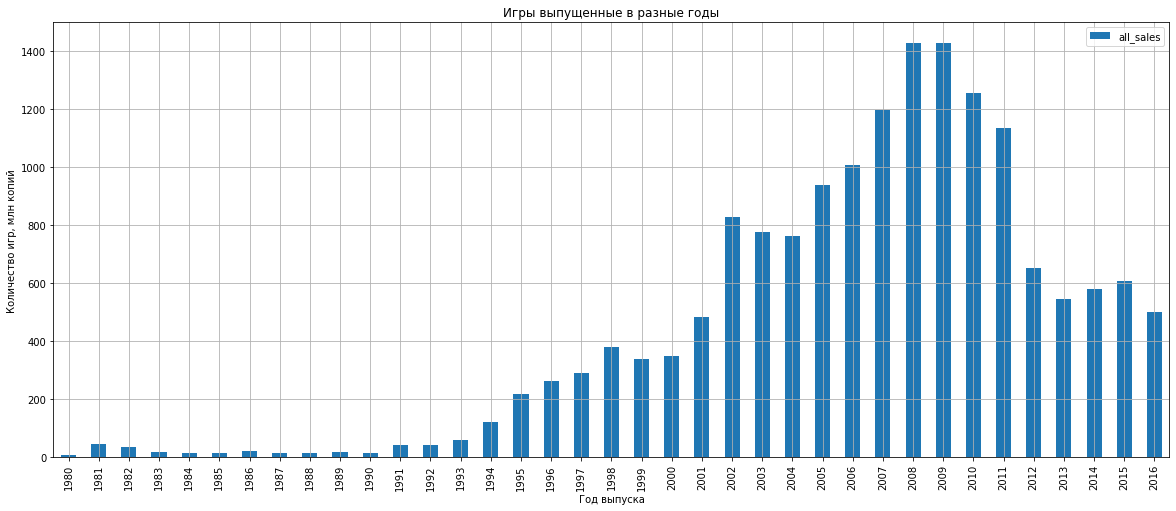

In [14]:
# Cколько игр выпускалось в разные годы
(data
    .query('year_of_release != -1')
    .pivot_table(index='year_of_release', values='all_sales', aggfunc='count')
    .plot(kind='bar', title='Игры выпущенные в разные годы', grid=True,figsize=(20,8))
)
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр, млн копий')
plt.show()

До 1995 года выпускалось незначительное количество игр, поэтому этими данными можно пренебречь

In [15]:
# определил топ-10 платформ с наибольшими продажами
data = data.query("1995 <= year_of_release")
data.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(10)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       721.55
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: all_sales, dtype: float64

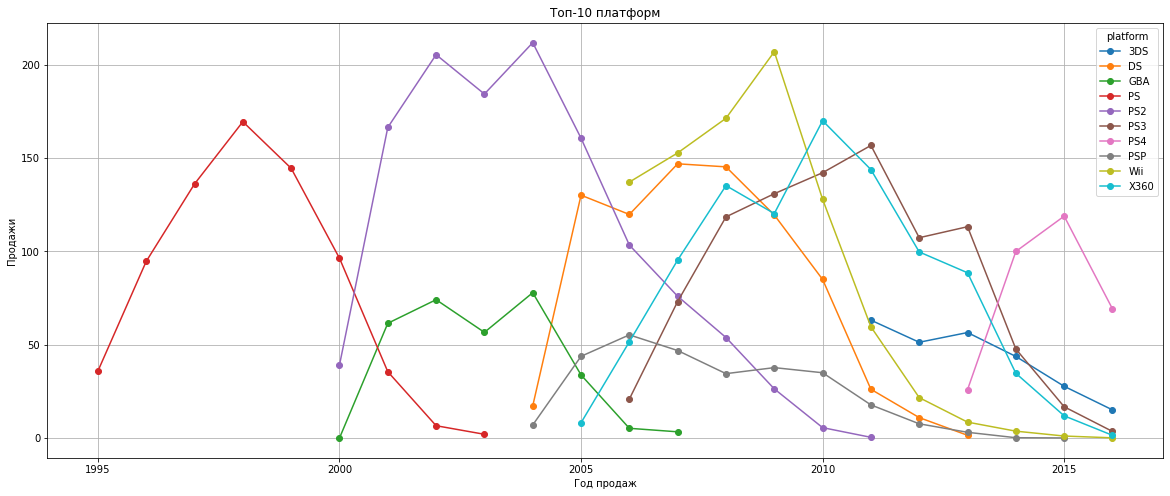

In [16]:
# строю график изменения продаж игр на платформе по годам 
top10_platform = data.query('platform == ["PS2", "X360", "PS3","Wii", "DS", "PS", "PS4", "GBA", "PSP", "3DS"]')
(top10_platform
    .pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
    .plot(kind='line', style='o-', title='Топ-10 платформ', grid=True, figsize=(20,8), xlabel = "Год продаж", ylabel = "Продажи")
)
plt.show()

Характерный срок за который появляются новые и исчезают старые платформы, исходя из графика можно назвать 7-10 лет

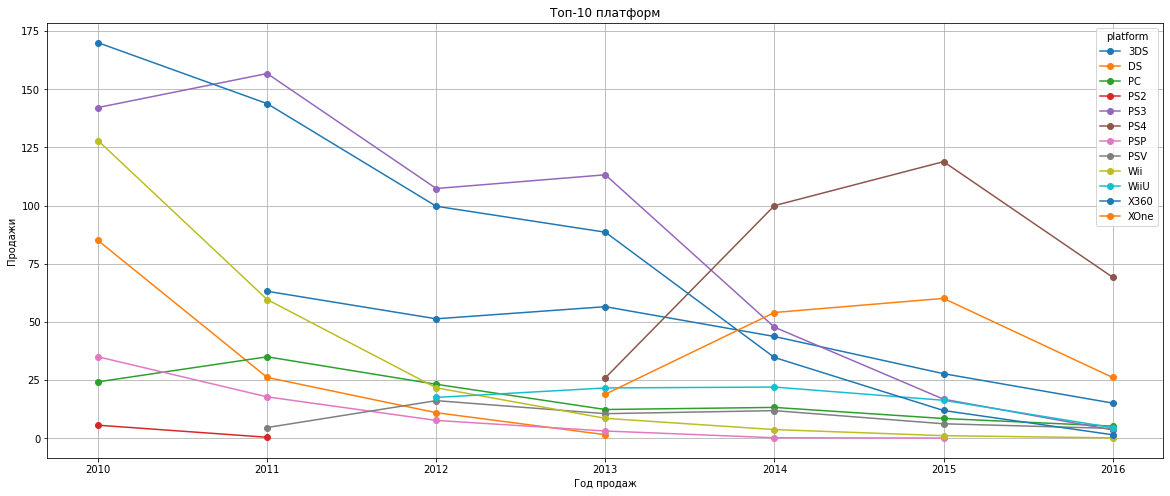

In [17]:
# построим график распределения по годам с 2010 по 2016 (актуальный период)
data_actual = data.query("2010 <= year_of_release <= 2016")
(
    data_actual.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
    .plot(kind='line', style='o-', title='Топ-10 платформ', grid=True, figsize=(20,8), xlabel = "Год продаж", ylabel = "Продажи")
)
plt.show()

На графике виден нисходящий тренд. Абсолютно на всех платформах игры продаются хуже предыдущего года, за исключением новых платформ, но постепенно они тоже переходят в нисходящий тренд. ТОП-3 самые популярные платформы в последние годы это PS4, XboxOne, Nintendo 3DS, они имееют наибольшие продажи игр на них относительно остальных платформ. 

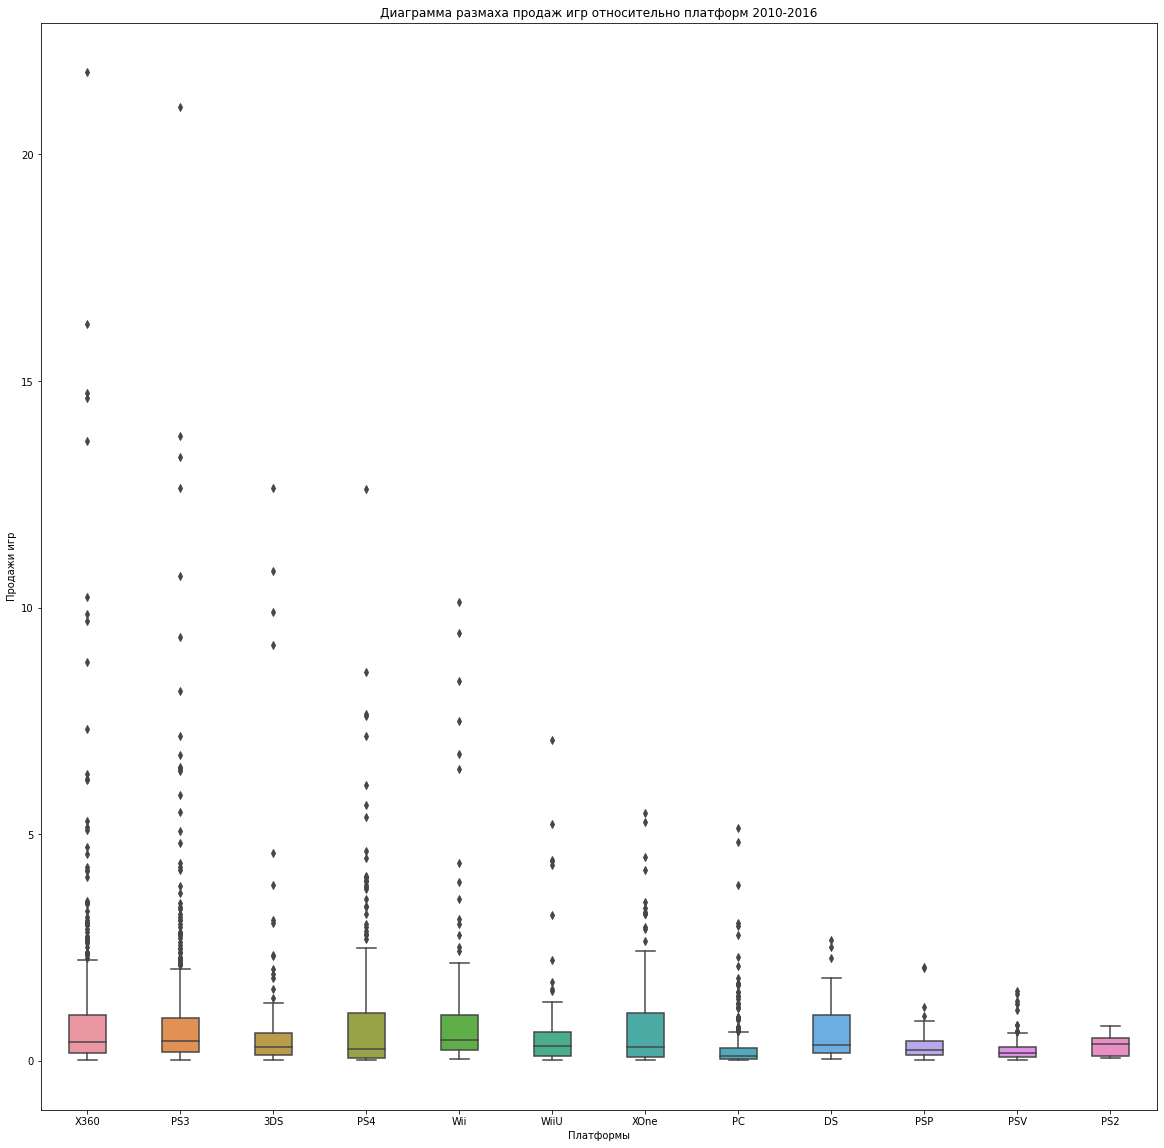

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,171.0,0.741111,1.684226,0.01,0.1300,0.310,0.6200,12.65
DS,48.0,0.662500,0.680915,0.04,0.1750,0.350,1.0050,2.67
PC,374.0,0.298770,0.582147,0.01,0.0400,0.110,0.2800,5.14
PS2,9.0,0.332222,0.257137,0.06,0.1000,0.380,0.5000,0.76
PS3,539.0,0.949184,1.763472,0.01,0.2000,0.440,0.9500,21.05
PS4,257.0,0.952996,1.627896,0.01,0.0700,0.260,1.0500,12.62
PSP,60.0,0.362000,0.402685,0.01,0.1200,0.235,0.4450,2.07
PSV,142.0,0.241338,0.272567,0.01,0.0800,0.165,0.3000,1.54
Wii,122.0,1.102377,1.824190,0.04,0.2325,0.450,1.0050,10.12


In [35]:
# общая диаграмму размаха
plt.rcParams['figure.figsize'] = (20, 20)
sns.boxplot(data=data_actual, x='platform', y='all_sales', width= 0.4, fliersize=(5))

plt.title('Диаграмма размаха продаж игр относительно платформ 2010-2016')
plt.xlabel('Платформы')
plt.ylabel('Продажи игр')
plt.show()

data_actual.groupby('platform')['all_sales'].describe()

Просмотрев общую диаграмму размаха мы видим частые выбросы и редкие. Выбросы вероятно связанны с продажами AAA-игр. Размер ящика характеризует разброс значений, в нашем случае нестабильность продаж.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Для исследования возьмем платформу PS4, т.к. у этой платформы значительные продажи ближе к концу взятого периода.

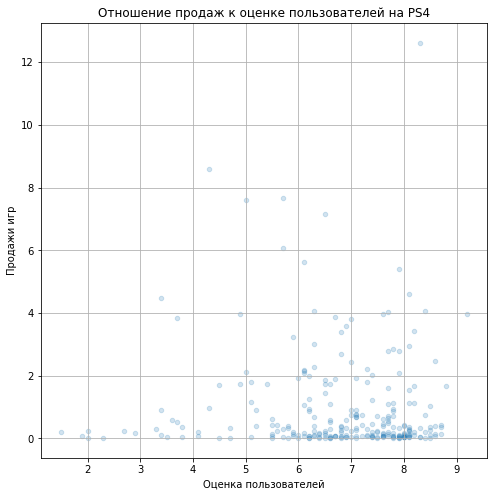

'Корреляция очень слабая: -0.03362497596528878'

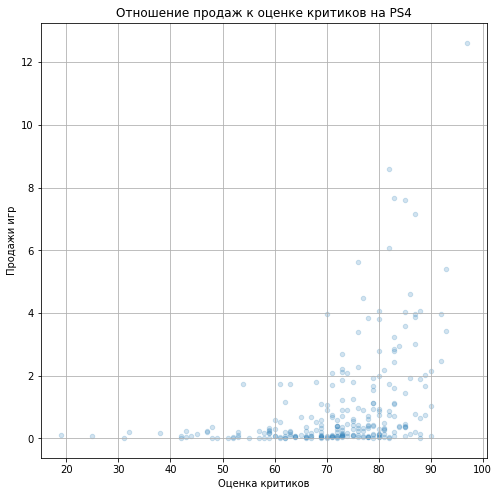

'Корреляция слабо положительная: 0.40589480145836687'

In [19]:
# фильтрую данные
data_ps4 = data[(data['platform']=='PS4') & (data['user_score'] != -1.0) & (data['critic_score'] != -1)]

# выведу таблицу рассеивания по платформе PS4, отобразив отзывы пользователей
(
    data_ps4
    .plot(x='user_score', y='all_sales', kind='scatter', alpha=0.2, figsize=(8,8), grid=True, title='Отношение продаж к оценке пользователей на PS4', xlabel = "Оценка пользователей", ylabel = "Продажи игр")
)
plt.show()
# считаю корреляцию между отзывами и продажами 
data_cor = data_ps4['user_score'].corr(data_ps4['all_sales'])
display('Корреляция очень слабая: {}'.format(data_cor))

# выведу таблицу рассеивания по платформе, отобразив отзывы критиков
(
    data_ps4
    .plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.2, figsize=(8,8), grid=True, title='Отношение продаж к оценке критиков на PS4', xlabel = "Оценка критиков", ylabel = "Продажи игр")
)
plt.show()
data_cor = data_ps4['critic_score'].corr(data_ps4['all_sales'])
display('Корреляция слабо положительная: {}'.format(data_cor))

#### Сделаем промежуточный вывод:
Просмотрев соотношение отзывов покупателе и критиков можно сказать, что большую часть составляют высокие оценки. Мы выяснили, что по данным из диаграммы рассеивания у нас:
* очень слабая корреляция -0.03362497596528878 по отзывам пользователей.
* слабо положительная корреляция 0.40589480145836687 по отзывам критиков.

Сравним данные с другими платформами. Предлагаю рассмотреть топ 5 платформ с наибольшими продажми за все время. 

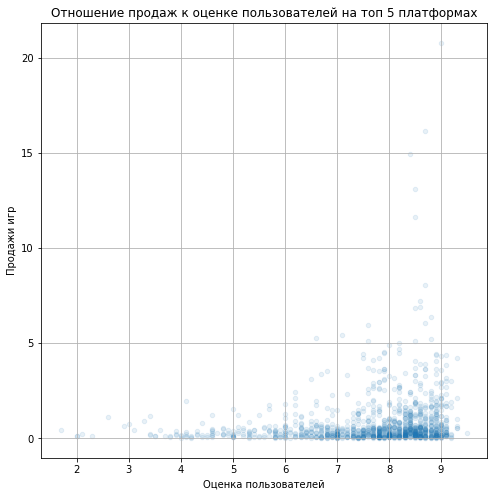

'Корреляция очень слабая: 0.17168986651472423'

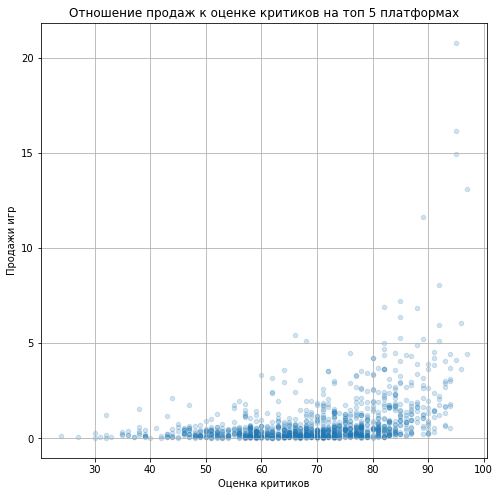

'Корреляция слабо положительная: 0.38641510284059993'

In [20]:
# фильтрую данные
top5_platform = data[(data['platform']==("PS2" or "X360" or "PS3" or"Wii" or "DS")) & (data['user_score'] != -1.0) & (data['critic_score'] != -1)]

# выведу таблицу рассеивания по платформам, отобразив отзывы пользователей
(
    top5_platform
    .plot(x='user_score', y='all_sales', kind='scatter', alpha=0.1, figsize=(8,8), grid=True, title='Отношение продаж к оценке пользователей на топ 5 платформах', xlabel = "Оценка пользователей", ylabel = "Продажи игр")
)
plt.show()
# считаю корреляцию между отзывами и продажами 
data_cor = top5_platform['user_score'].corr(top5_platform['all_sales'])
display('Корреляция очень слабая: {}'.format(data_cor))

# выведу таблицу рассеивания по платформе, отобразив отзывы критиков
(
    top5_platform
    .plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.2, figsize=(8,8), grid=True, title='Отношение продаж к оценке критиков на топ 5 платформах', xlabel = "Оценка критиков", ylabel = "Продажи игр")
)
plt.show()
data_cor = top5_platform['critic_score'].corr(top5_platform['all_sales'])
display('Корреляция слабо положительная: {}'.format(data_cor))

Для убедительности посмотрим так же не только популярные платформы

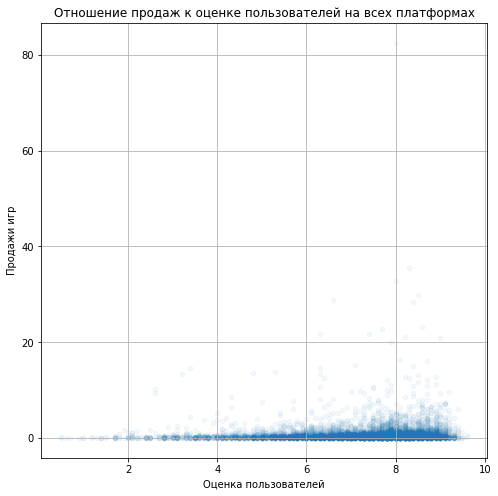

'Корреляция очень слабая: 0.08832590184356441'

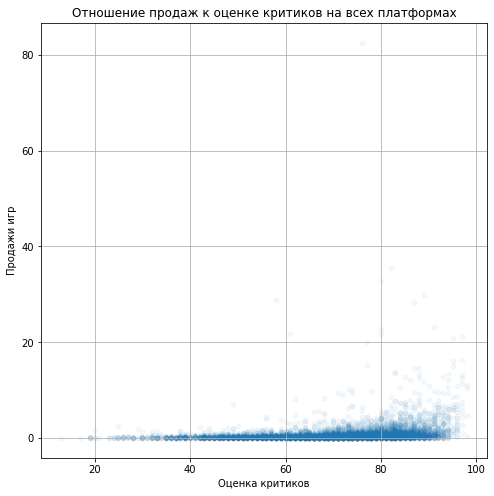

'Корреляция слабо положительная: 0.23712325333419962'

In [21]:
# фильтрую данные
data_filter = data[(data['user_score'] != -1.0) & (data['critic_score'] != -1)]
# выведу таблицу рассеивания по платформам, отобразив отзывы пользователей
(
    data_filter
    .plot(x='user_score', y='all_sales', kind='scatter', alpha=0.05, figsize=(8,8), grid=True, title='Отношение продаж к оценке пользователей на всех платформах', xlabel = "Оценка пользователей", ylabel = "Продажи игр")
)
plt.show()
# считаю корреляцию между отзывами и продажами 
data_cor = data_filter ['user_score'].corr(data_filter ['all_sales'])
display('Корреляция очень слабая: {}'.format(data_cor))

# выведу таблицу рассеивания по платформе, отобразив отзывы критиков
(
    data_filter
    .plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.05, figsize=(8,8), grid=True, title='Отношение продаж к оценке критиков на всех платформах', xlabel = "Оценка критиков", ylabel = "Продажи игр")
)
plt.show()
data_cor = data_filter ['critic_score'].corr(data_filter ['all_sales'])
display('Корреляция слабо положительная: {}'.format(data_cor))

Вывод:
Просмотрев соотношение отзывов покупателе и критиков можно сказать, что предварительные выводы были верны. Мы выяснили, что по данным из диаграммы рассеивания у нас:
* Большую часть составляют высокие оценки, примечательно что на топовых платформах средняя оценка пользователей выше, а оценка критиков ниже, чем у среднеплатформенных оценок.
* очень слабая корреляция по отзывам пользователей. 
* Слабо положительная корреляция по отзывам критиков.

#### Посмотрим на общее распределение игр по жанрам.

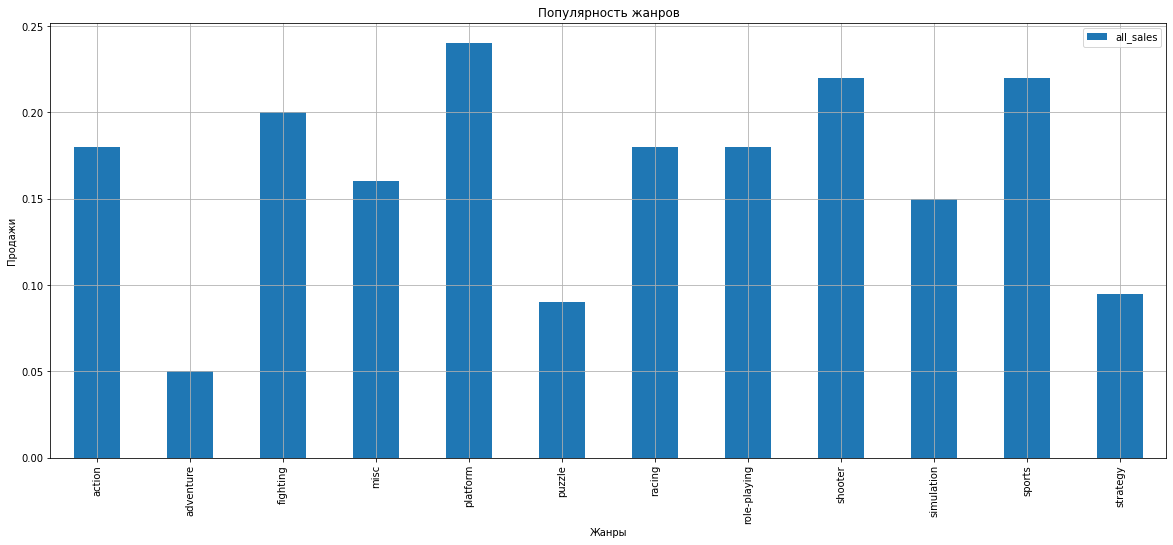

In [22]:
# популярность жанров на всех платформах за все время
(
    data.pivot_table(index='genre', values='all_sales', aggfunc='median')
    .plot(kind='bar', title='Популярность жанров', grid=True, figsize=(20,8), xlabel = "Жанры", ylabel = "Продажи")
)
plt.show()

Мы можем выделить ТОП-5 жанров:
1. Platform
2. Shooter
3. Sports
4. Fighting
5. Action, Racing, Role-playing - делят 5 позицию

ТОП-5 самых непопулярных жанров:
1. Adventure
2. Puzzle
3. Strategy
4. Simulation
5. Misc

Сравним какие жанры популярны в актуальное время

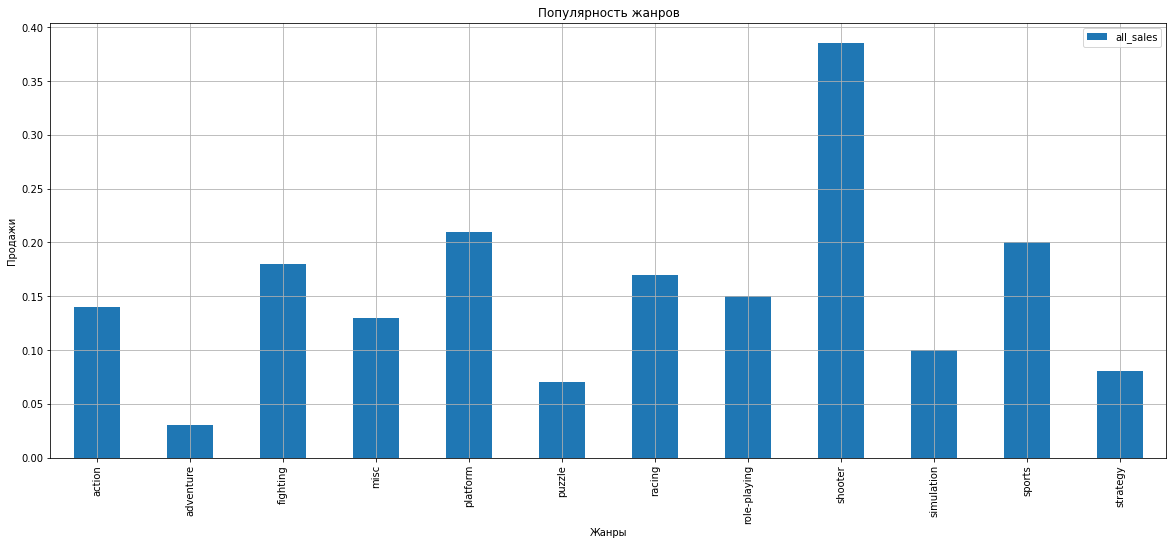

In [23]:
(
    data_actual.pivot_table(index='genre', values='all_sales', aggfunc='median')
    .plot(kind='bar', title='Популярность жанров', grid=True, figsize=(20,8), xlabel = "Жанры", ylabel = "Продажи")
)
plt.show()

ТОП-5 жанров:
1. Shooter
2. Platform
3. Sports
4. Fighting
5. Racing

ТОП-5 самых непопулярных жанров:
1. Adventure
2. Puzzle
3. Strategy
4. Simulation
5. Misc

Можно сказать, что такие жанры как Shooter, Platform, Sports, Fighting интересны наибольшему числу пользвателей, чем Strategy или Simulation, cоответствено такие жанры лучше продаются. 
Жанры с высокими и низкими продажами как мы видим на графиках значительно выделяются друг от друга.

### Основные выводы из исследования
* До 1995 года выпускалось незначительное количество игр.
* Характерный срок за который появляются новые и исчезают старые платформы, исходя из графика можно назвать 7-10 лет.
* Абсолютно на всех платформах в актуальный период игры продаются хуже предыдущих года, за исключением новых платформ, но постепенно они тоже переходят в нисходящий тренд. 
* ТОП-3 самые популярные платформы в актуальный период это PS4, XboxOne, Nintendo 3DS, они имееют наибольшие продажи игр относительно других платформ.
* Размер ящика на диаграмме размаха характеризует разброс значений, в нашем случае нестабильность продаж, вероятно связанные с продажами AAA-игр.
* Большую часть оценок критиков и пользователей составляют высокие оценки, но они имеют слабую корреляцию с продажами. 
* Самые прибыльные жанры это Platform, Shooter, Sports, Fighting

## Портрет пользователя каждого региона

#### ТОП-5 самых популярных платформ в регионах (NA, EU, JP)

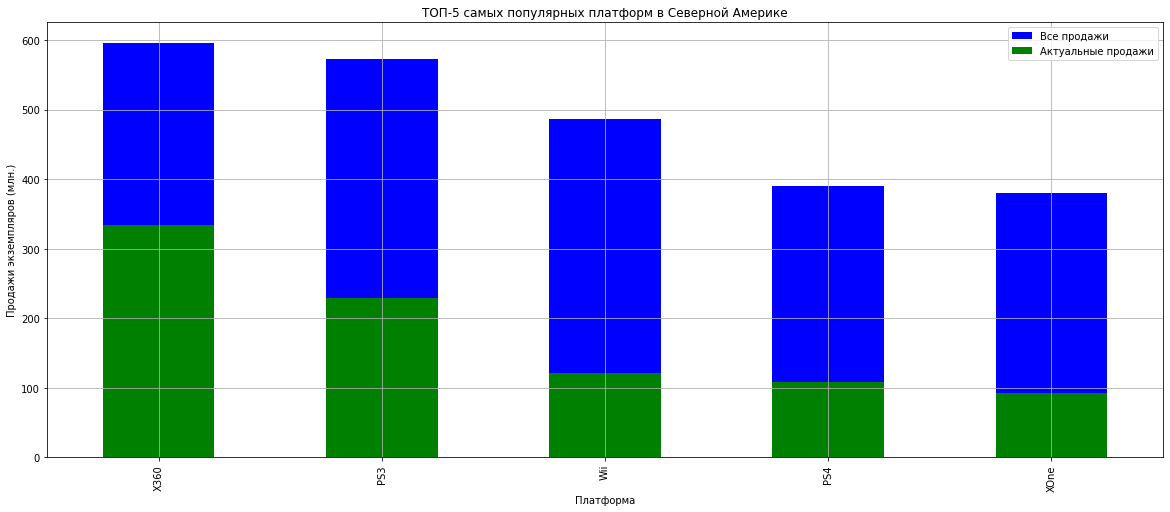

In [24]:
# ТОП-5 самых популярных платформ в Северной Америке по общей таблице
platform_na_top5 = data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
platform_na_top5.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, color="b", label="Все продажи", title = 'ТОП-5 самых популярных платформ в Северной Америке')
#plt.xlabel('Платформа')
#plt.ylabel('Продажи экземпляров (млн.)')
#plt.show()
(data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
     .plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, color="g", label="Актуальные продажи")
)
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.legend()
plt.show()

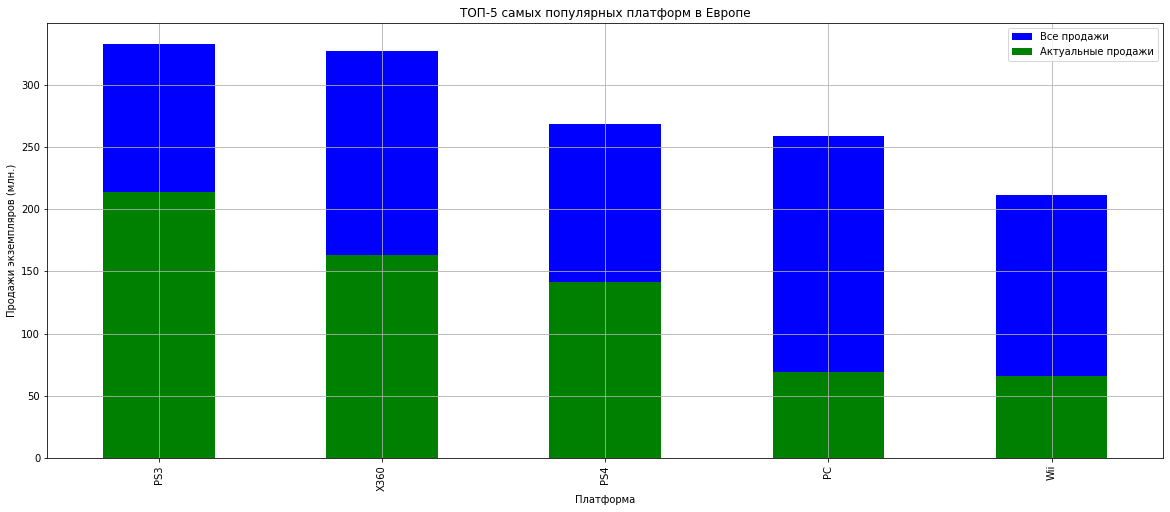

In [25]:
# ТОП-5 самых популярных платформ в Европе по общей таблице
platform_eu_top5 = data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
platform_eu_top5.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True,color="b", label="Все продажи", title = 'ТОП-5 самых популярных платформ в Европе')
#plt.xlabel('Платформа')
#plt.ylabel('Продажи экземпляров (млн.)')
#plt.show()
(data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
     .plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True,color="g", label="Актуальные продажи")
)
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.legend()
plt.show()

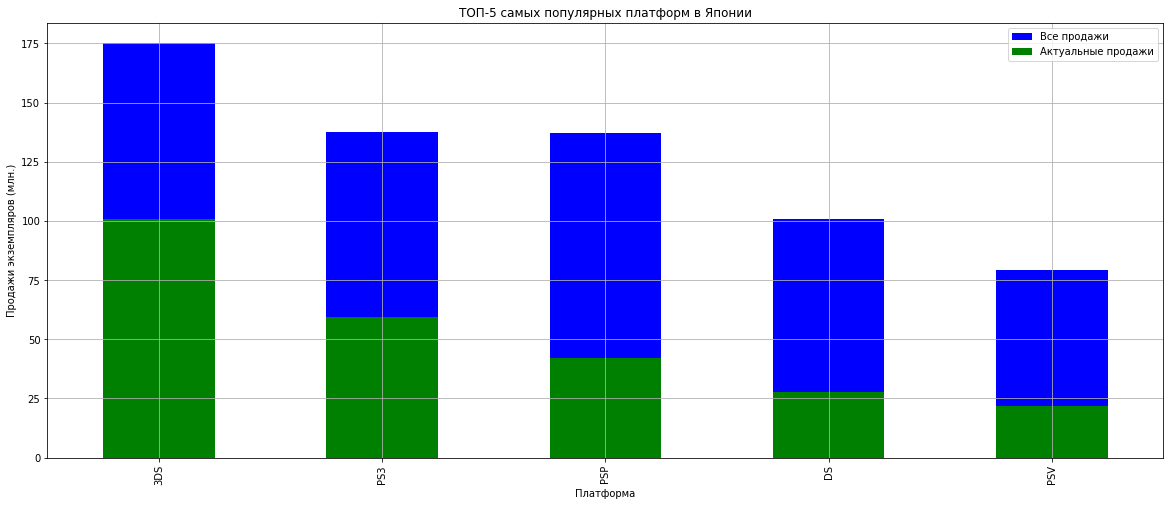

In [26]:
# ТОП-5 самых популярных платформ в Японии по общей таблице
platform_jp_top5 = data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
#построим гистограмму
platform_jp_top5.plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(20,8),color="b", grid=True,label="Все продажи", title = 'ТОП-5 самых популярных платформ в Японии')
#plt.xlabel('Платформа')
#plt.ylabel('Продажи экземпляров (млн.)')
#plt.show()

(data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
     .plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True,color="g", label="Актуальные продажи")
)
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')
plt.legend()
plt.show()

#### Промежуточный вывод:
* В Америке очень популярны местные платформы Microsoft, а так же многочисленны платформы Sony и Nintendo Wii.
* В Европе платформы Sony немного популярнее платформ Microsoft. Примечательно, что PC тоже имеет значительную популярность в европе.
* В Японии платформы от Sony и Nintendo занимают примерно равное, доминирующее положение на рынке. 

#### ТОП-5 самых популярных жанров в регионах (NA, EU, JP)

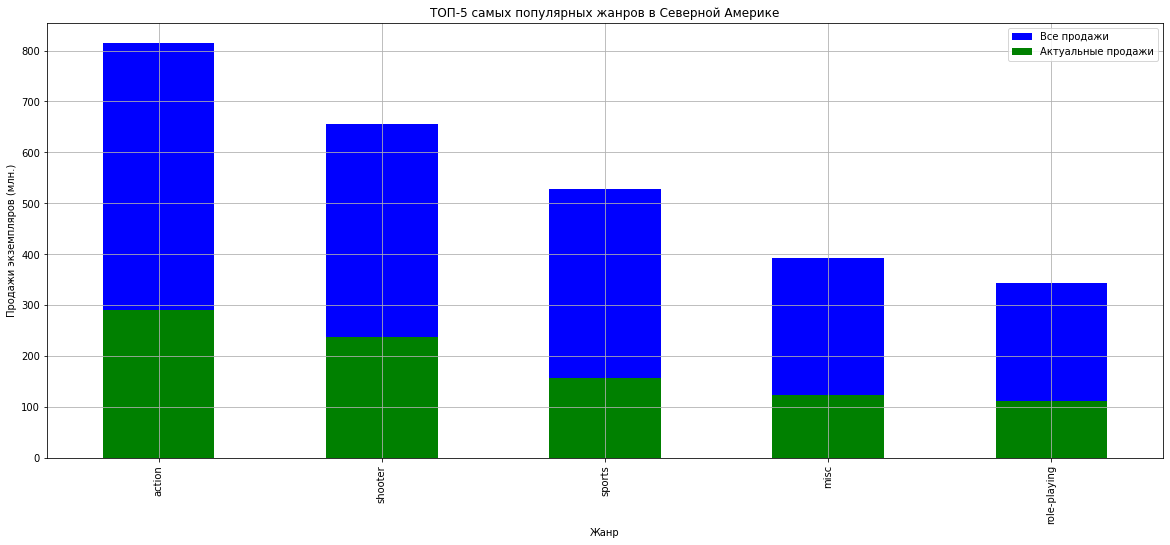

In [27]:
# ТОП-5 самых популярных платформ в Северной Америке по общей таблице
(data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
     .plot(x = 'genre', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, color="b", label="Все продажи", title = 'ТОП-5 самых популярных жанров в Северной Америке')
)
#plt.xlabel('Жанр')
#plt.ylabel('Продажи экземпляров (млн.)')
#plt.show()

(data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
     .plot(x = 'genre', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True,color="g", label="Актуальные продажи")
)
plt.xlabel('Жанр')
plt.ylabel('Продажи экземпляров (млн.)')
plt.legend()
plt.show()

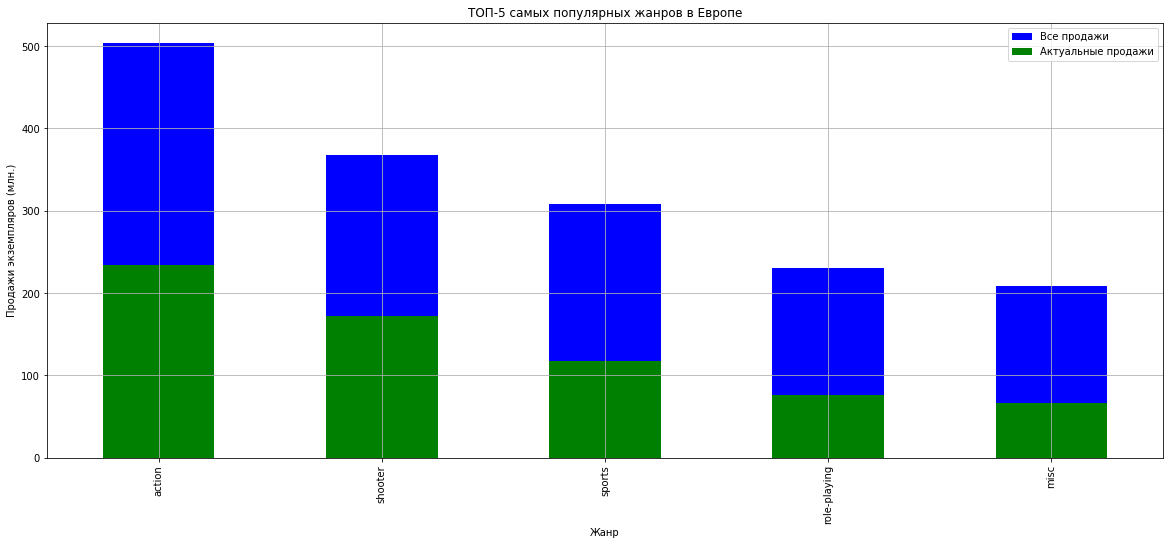

In [28]:
# ТОП-5 самых популярных платформ в Европе по общей таблице
(data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
     .plot(x = 'genre', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, color="b", label="Все продажи", title = 'ТОП-5 самых популярных жанров в Европе')
)
#plt.xlabel('Жанр')
#plt.ylabel('Продажи экземпляров (млн.)')
#plt.show()

(data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
     .plot(x = 'genre', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, color="g", label="Актуальные продажи")
)
plt.xlabel('Жанр')
plt.ylabel('Продажи экземпляров (млн.)')
plt.legend()
plt.show()

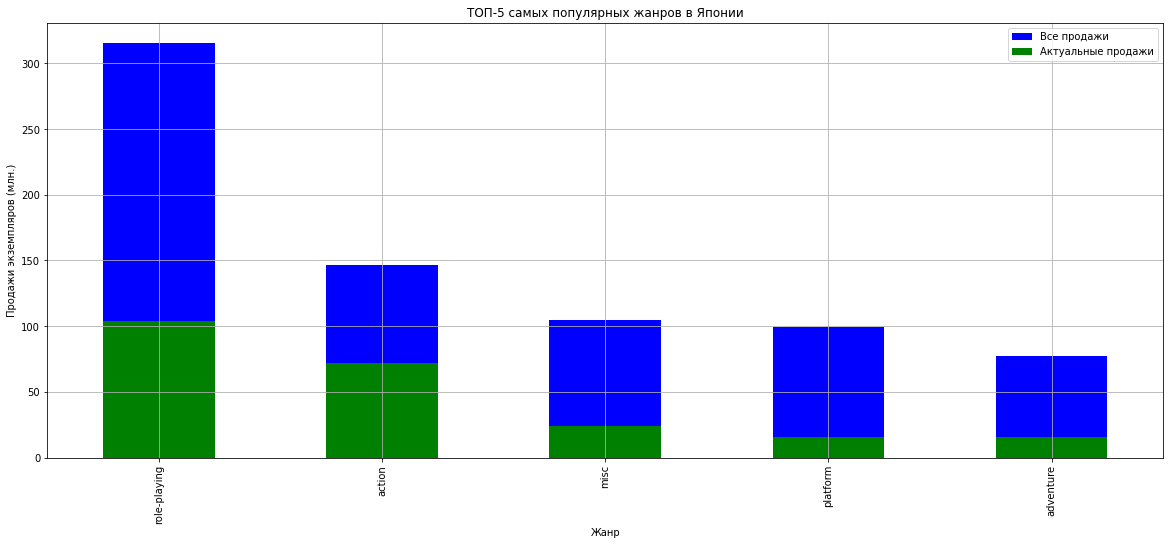

In [29]:
# ТОП-5 самых популярных платформ в Японии по общей таблице
(data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
     .plot(x = 'genre', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, color="b", label="Все продажи", title = 'ТОП-5 самых популярных жанров в Японии')
)
#plt.xlabel('Жанр')
#plt.ylabel('Продажи экземпляров (млн.)')
#plt.show()

(data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
     .plot(x = 'genre', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, color="g", label="Актуальные продажи")
)
plt.xlabel('Жанр')
plt.ylabel('Продажи экземпляров (млн.)')
plt.legend()
plt.show()

#### Промежуточный вывод:
В Америке популярные жанры: 
1. Action
2. Shooter
3. Sports
4. Misc
5. Role_plaing

В Европе популярные жанры:
1. Action
2. Shooter
3. Sports
4. Role_plaing
5. Misc 

В Японии популярные жанры:
1. Role_plaing
2. Action
3. Misc   
4. Platform
5. Adventure

#### Влияние рейтинга ESRB на продажи в регионах (NA, EU, JP)

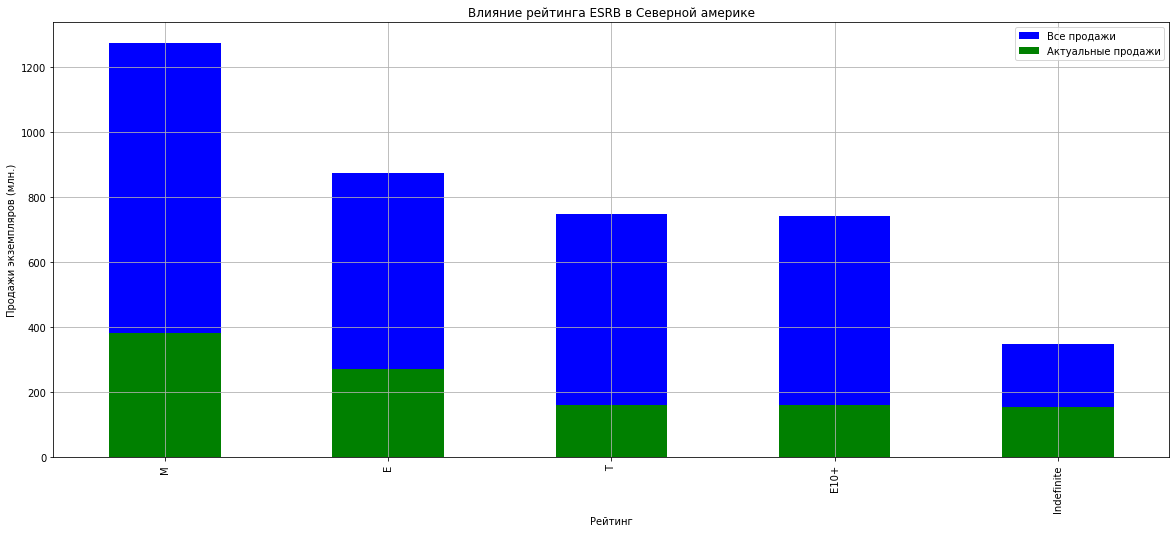

In [30]:
# как влияет рейтнг ESRB
(data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)
     .plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, color="b", label="Все продажи", title = 'Влияние рейтинга ESRB в Северной америке')
)
#plt.xlabel('Жанр')
#plt.ylabel('Продажи экземпляров (млн.)')
#plt.show()

(data_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)
     .plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, color="g", label="Актуальные продажи")
)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.legend()
plt.show()

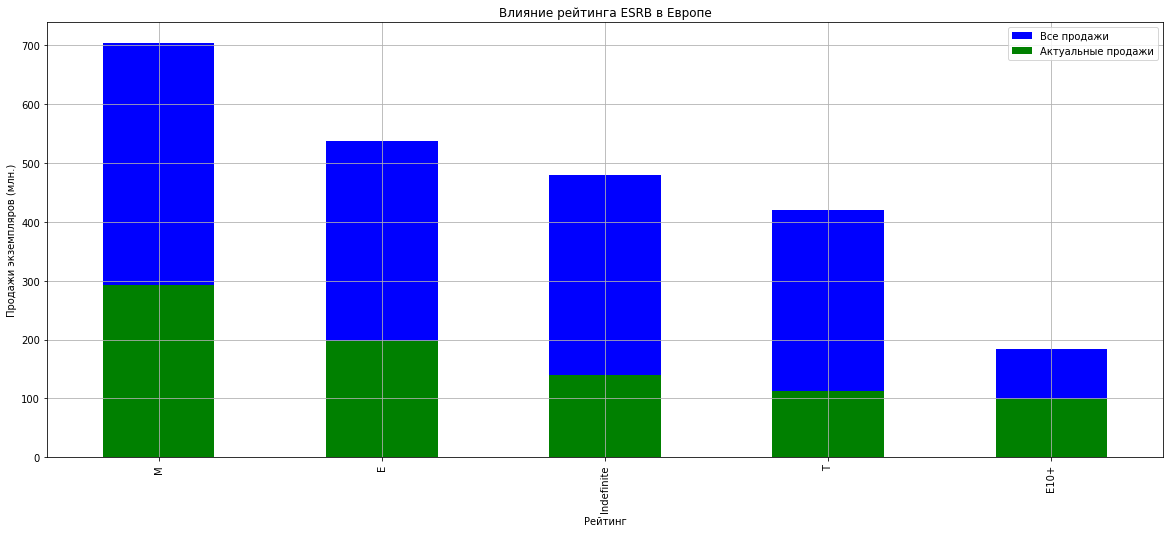

In [31]:
(data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
     .plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, color="b", label="Все продажи", title = 'Влияние рейтинга ESRB в Европе')
)
#plt.xlabel('Жанр')
#plt.ylabel('Продажи экземпляров (млн.)')
#plt.show()

(data_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
     .plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, color="g", label="Актуальные продажи")
)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.legend()
plt.show()

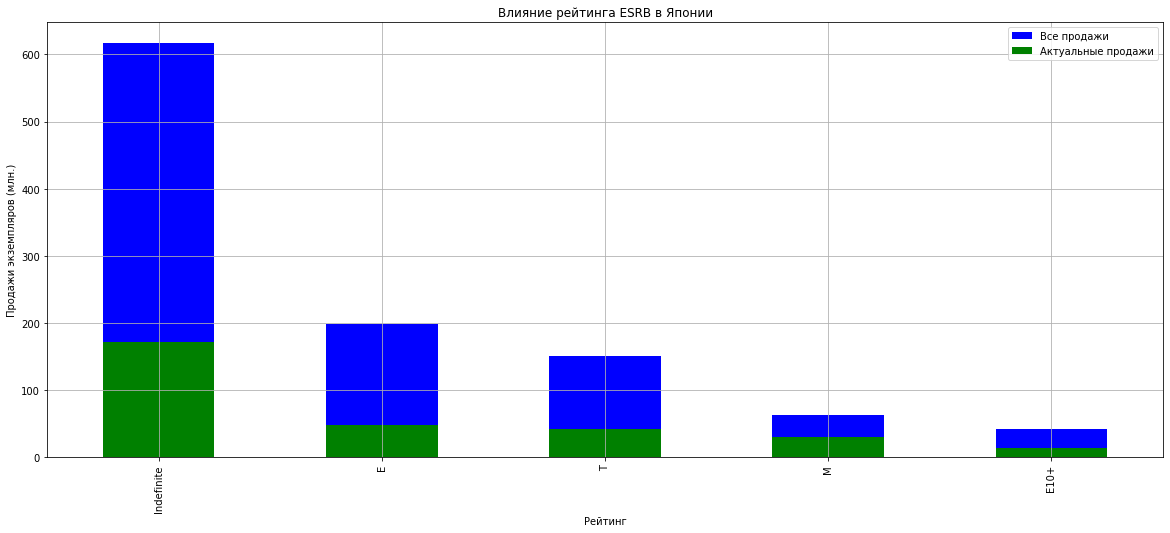

In [32]:
(data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)
     .plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, color="b", label="Все продажи", title = 'Влияние рейтинга ESRB в Японии')
)
#plt.xlabel('Жанр')
#plt.ylabel('Продажи экземпляров (млн.)')
#plt.show()

(data_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)
     .plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(20,8), grid=True, color="g", label="Актуальные продажи")
)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')
plt.legend()
plt.show()

#### Промежуточный вывод:
* В Северной Америке самые высокие продажи у рейтинга M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.), далее по популярности игры категории E ("Everyone"). Остальные жанры менее популярные.
* В Европе самые высокие продажи у рейтинга M, далее по популярности игры категории E ("Everyone"). Остальные жанры менее популярные.
* В Японии самые высокие продажи у рейтинга у игр, в которых жанры неопределенны, далее по популярности жанр E("Everyone"). Остальные жанры менее популярные.

### Вывод по портретам регионов
В исследовании мы выделили самые популярные платформы и жанры по регионам.
Самые популярные платформы:
* В Америке: Xbox360
* В Европе: PS3
* В Японии: Nintendo 3DS

В разных регионах самые популярные жанры игр следующие:
* В Америке: Action
* В Европе: Aсtion
* В Японии: Role_plaing

Рейтинг от организации ESRB:
* В Америке: M
* В Европе: M
* В Японии: жанр неопределен
    
Можно сделать вывод,что рейтинг влияет на продажи. В западных странах популярен рейтинг M («Для взрослых»), такие рейтинги как "E", "T" продаются определенно хуже. В японии популярный жанр неопределен, вероятно связан с тем, что на японском рынке их игры трудно отнести к определенным жанрам.

## Проверка гипотез

Функция ttest_ind - проверяет нулевую гипотезу о том, что две независимые выборки имеют одинаковые средние (ожидаемые) значения.

Гипотеза: Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.
      
* H0: Рейтинг (user_score) для платформы Xbox One = Рейтинг (user_score) для платформы PC
* H1: Рейтинг (user_score) для платформы Xbox One ≠ Рейтинг (user_score) для платформы PC

In [33]:
# убираю значения которые были пропусками
data_actual = data_actual[data_actual['user_score'] != -1]

# выборки по необходимым платформам
array_1 = data_actual[data_actual['platform'] == 'XOne']
array_2 = data_actual[data_actual['platform'] == 'PC']

#перезапишем две выборки конкретных столбцов с пользовательскими рейтингами.
array_1 = array_1['user_score']
array_2 = array_2['user_score']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    array_1,
    array_2)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.980998110649032
Не получилось отвергнуть нулевую гипотезу


Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.
* H0: Рейтинг (user_score) для жанра Action = Рейтинг (user_score) для жанра Sports
* H1: Рейтинг (user_score) для жанра Action ≠ Рейтинг (user_score) для жанра Sports.

In [34]:
# выборки по необходимым платформам
array_3 = data_actual[data_actual['genre'] == 'action']
array_4 = data_actual[data_actual['genre'] == 'sports']

#перезапишем две выборки конкретных столбцов с пользовательскими рейтингами.
array_3 = array_3['user_score']
array_4 = array_4['user_score']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    array_3,
    array_4)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.839124224330309e-19
Отвергаем нулевую гипотезу


#### Вывод
В первой гипотезе:
Результат говорит о том, что не получилось отвергнуть нулевую гипотезу.
p-значение: 9.379956219356061e-06
Значит, средние оценки пользователей по платформам Xbox One и PC одинаковые.

Во второй гипотезе:
Результат говорит о том, что отвергаем нулевую гипотезу.
p-значение: 0.06480928064420527
Значит, средние оценки пользователей по жанрам Action и Sports разные.

## Общий вывод
Провели исследовательскую работу промежуточные выводы по которой есть в каждом этапе работы. По итогам можно сделать прогноз на 2017 год в игровой индустрии:
    
* Был анализирован период с 2015-2016 года, и в этот период ТОП-3 самые популярные платформы в актуальный период это PS4(Европа), XboxOne(Америка), Nintendo 3DS(Япония), они имееют наибольшие продажи игр относительно других платформ.
* Характерный срок за который появляются новые и исчезают старые платформы, исходя из графика можно назвать 7-10 лет. Соответственно эти платформы будут актуальными, все еще будут продаваться
* Оценки пользователей и критиков почти не влияют на продажи.
* Самые прибыльные жанры это Platform, Shooter, Sports, Fighting.
* Рейтинг ESRB влияет на продажи в разных регионах, категория M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет), самая прибыльная категория. 

В резльтате можно сказать, что ожидать наибольшую прибыль у игр на популярных платформах, таких как PS4 и Xbox One, т.к. они популярны в большинстве стран мира, и по жанру Shooter, Platform и Sports. Возрастная категория M пользуется большим спросом на рынке.